In [2]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



# Question 1

## a)

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [4]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [5]:
set.seed(1)

In [6]:
g_q1 <- random.graph.game(1000, p = 0.01, directed = F)

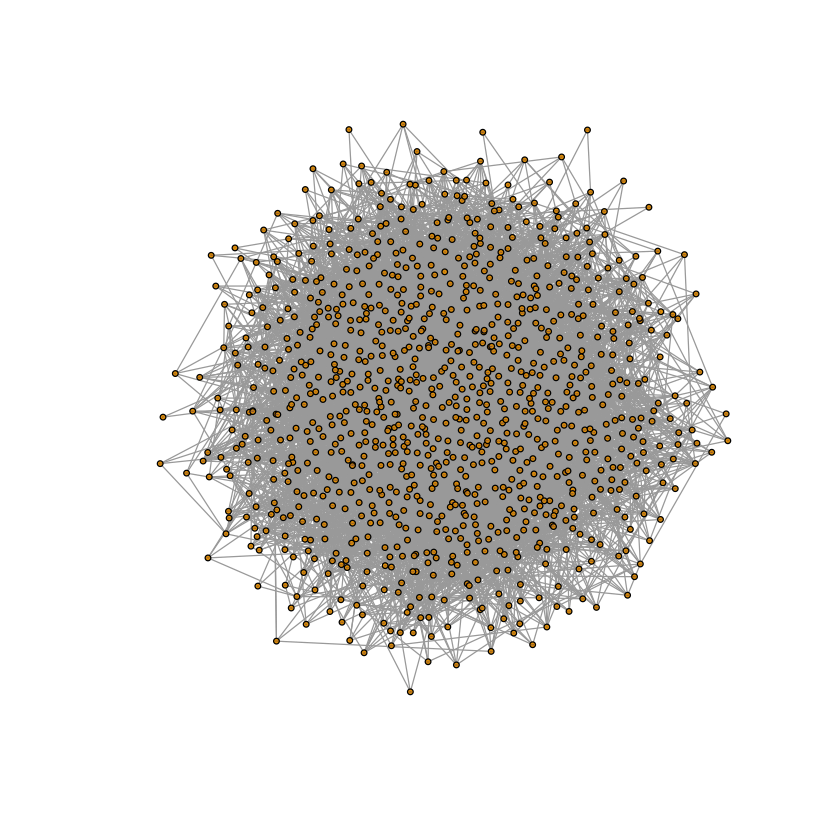

In [7]:
plot(g_q1,vertex.size=2, vertex.label.cex=0.1)

## b)

In [130]:
random_walk_plot = function (g, num_steps, start_node, dis_arr, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        
        shortpath <- shortest.paths(g, start_node, v)
        eval.parent(substitute(dis_arr<-append(dis_arr,shortpath)))     #pass by reference
        
        
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [131]:
sum_arr<-rep(0,200)

In [132]:
start_node<- sample(1:vcount(g_q1),50)

In [133]:
for (s_n in start_node){
    dis<-c()
    random_walk_plot(g_q1,200,s_n,dis)
    sum_arr<- sum_arr + dis
}

In [136]:
sum_arr<-sum_arr/50

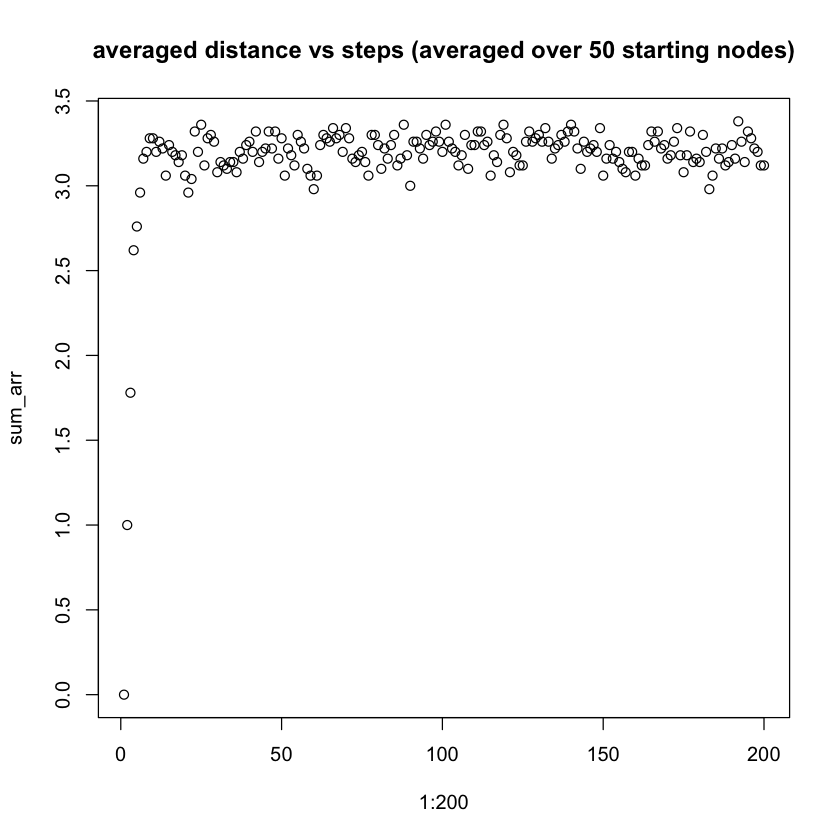

In [140]:
plot(1:200,sum_arr,main="averaged distance vs steps (averaged over 50 starting nodes)")